In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_30cm = "../data/30cm.xlsx"
file_60cm = "../data/60cm.xlsx"

data_30cm = pd.read_excel(file_30cm)
data_60cm = pd.read_excel(file_60cm)

In [3]:
data_30cm.head()

,Date,Temperature,pH,Turbidity
0,2020-01-15 16:00:35,20.99,7.81,197
1,2020-01-15 16:01:33,20.99,7.81,197
2,2020-01-15 16:02:33,20.98,7.81,197
3,2020-01-15 16:03:22,20.98,7.81,197
4,2020-01-15 16:04:26,20.98,7.81,197


In [4]:
data_60cm.head()

,Date,Temperature,Turbidity
0,2020-01-15 16:00:35,22.54,134
1,2020-01-15 16:01:33,22.54,134
2,2020-01-15 16:02:33,22.54,134
3,2020-01-15 16:03:22,22.54,134
4,2020-01-15 16:04:26,22.54,134


In [5]:
data_30cm['Datetime'] = pd.to_datetime(data_30cm['Date'], errors="coerce")
data_60cm['Datetime'] = pd.to_datetime(data_60cm['Date'], errors="coerce")

In [6]:
# Summary statistics
print("Summary statistics for 30 cm depth:")
print(data_30cm.describe())
print("\nSummary statistics for 60 cm depth:")
print(data_60cm.describe())

Summary statistics for 30 cm depth:
       Temperature           pH    Turbidity                       Datetime
count  9623.000000  9623.000000  9623.000000                           9623
mean     20.004782     7.757886   215.485192  2020-01-19 02:14:18.689701632
min      15.600000     6.980000   194.000000            2020-01-15 16:00:35
25%      18.350000     7.380000   202.000000            2020-01-17 10:56:17
50%      19.950000     7.740000   212.000000            2020-01-19 00:21:20
75%      21.590000     8.230000   224.000000     2020-01-20 18:32:31.500000
max      23.810000     8.430000   249.000000            2020-01-22 16:25:32
std       2.049986     0.443601    16.179374                            NaN

Summary statistics for 60 cm depth:
       Temperature    Turbidity                       Datetime
count  9623.000000  9623.000000                           9623
mean     21.512562   141.853996  2020-01-19 02:14:18.689701632
min      18.080000   134.000000            2020-01-15 

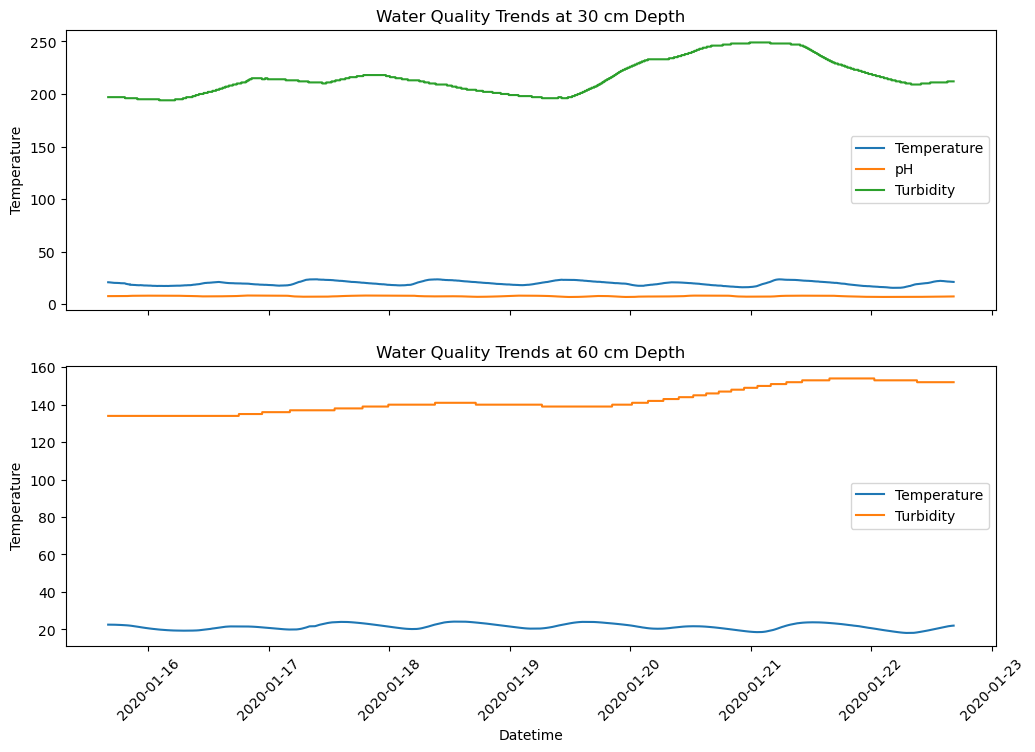

In [7]:
# Plot time series
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

sns.lineplot(data=data_30cm, x="Datetime", y="Temperature", label="Temperature", ax=axes[0])
sns.lineplot(data=data_30cm, x="Datetime", y="pH", label="pH", ax=axes[0])
sns.lineplot(data=data_30cm, x="Datetime", y="Turbidity", label="Turbidity", ax=axes[0])
axes[0].set_title("Water Quality Trends at 30 cm Depth")
axes[0].legend()

sns.lineplot(data=data_60cm, x="Datetime", y="Temperature", label="Temperature", ax=axes[1])
sns.lineplot(data=data_60cm, x="Datetime", y="Turbidity", label="Turbidity", ax=axes[1])
axes[1].set_title("Water Quality Trends at 60 cm Depth")
axes[1].legend()

plt.xticks(rotation=45)
plt.show()

### Temperature

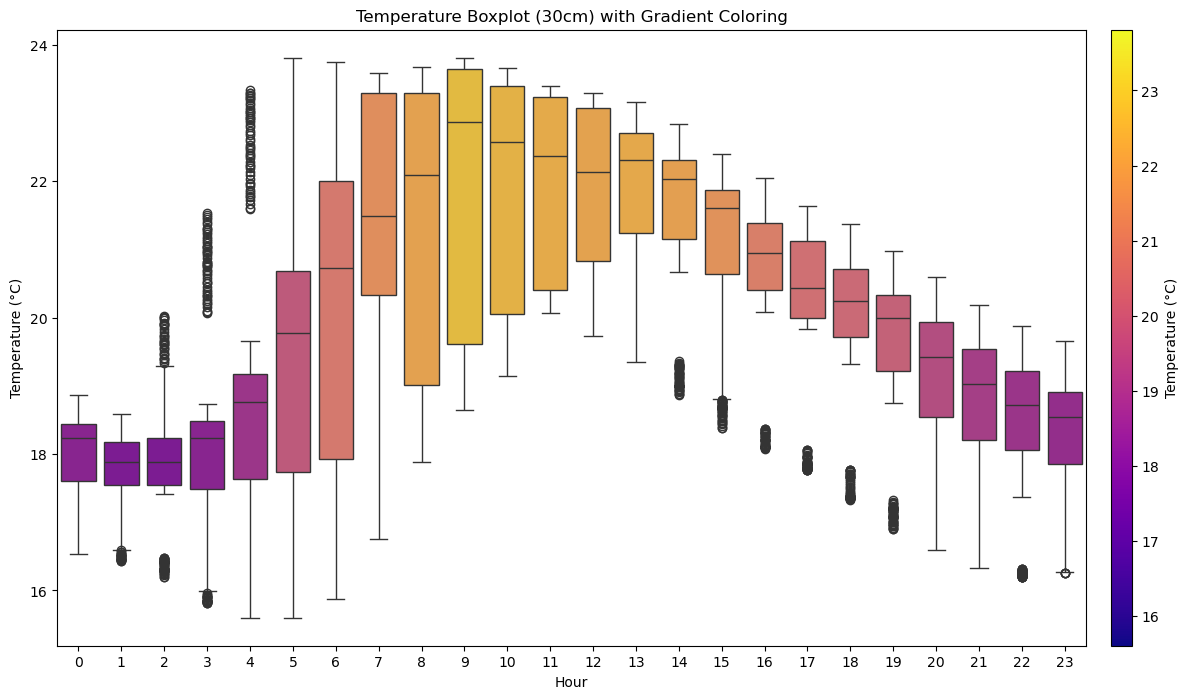

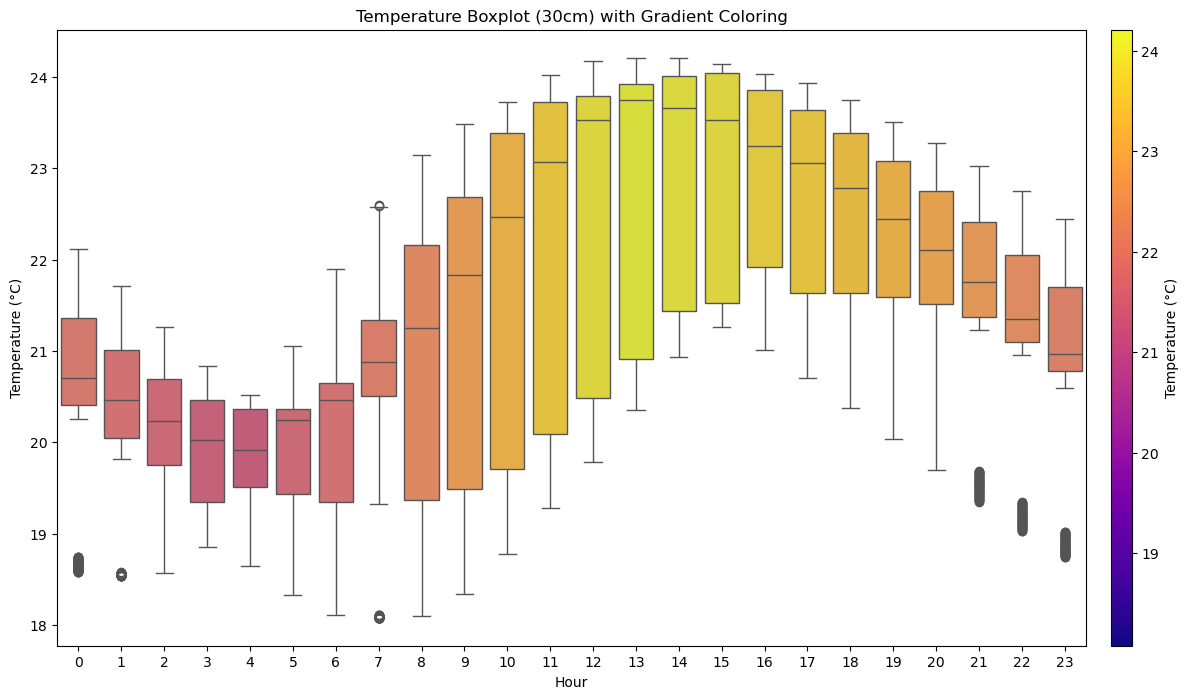

In [8]:
import matplotlib.patches as mpatches

# Diurnal Patterns (Day vs. Night Analysis)
data_30cm["Hour"] = data_30cm["Datetime"].dt.hour
data_60cm["Hour"] = data_60cm["Datetime"].dt.hour

cmap = plt.cm.plasma  # 'plasma' gives a nice temperature gradient, you can try 'coolwarm' or 'viridis'
# Normalize temperature values for mapping colors
norm_30cm = plt.Normalize(data_30cm["Temperature"].min(), data_30cm["Temperature"].max())
norm_60cm = plt.Normalize(data_60cm["Temperature"].min(), data_60cm["Temperature"].max())
                          
color_mapping_30cm = {f"{hour}": cmap(norm_30cm(data_30cm[data_30cm["Hour"] == hour]["Temperature"].median())) for hour in range(24)}
color_mapping_60cm = {f"{hour}": cmap(norm_30cm(data_60cm[data_60cm["Hour"] == hour]["Temperature"].median())) for hour in range(24)}

# Convert the dictionary into a list of colors in order of appearance
palette_30cm = [color_mapping_30cm[f"{hour}"] for hour in sorted(data_30cm["Hour"].unique())]
palette_60cm = [color_mapping_60cm[f"{hour}"] for hour in sorted(data_60cm["Hour"].unique())]

# Create the figure and axis
plt.figure(figsize=(16, 8))

# Create a boxplot (without color first)
ax = sns.boxplot(x="Hour", y="Temperature", hue="Hour", data=data_30cm, palette=palette_30cm, legend=False)

# Add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm_30cm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, aspect=30, pad=0.02)
cbar.set_label("Temperature (°C)")

# Labels and title
ax.set_title("Temperature Boxplot (30cm) with Gradient Coloring")
ax.set_ylabel("Temperature (°C)")

# Show plot
plt.show()

# Create the figure and axis
plt.figure(figsize=(16, 8))

# Create a boxplot (without color first)
ax = sns.boxplot(x="Hour", y="Temperature", hue="Hour", data=data_60cm, palette=palette_60cm, legend=False)

# Add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm_60cm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, aspect=30, pad=0.02)
cbar.set_label("Temperature (°C)")

# Labels and title
ax.set_title("Temperature Boxplot (30cm) with Gradient Coloring")
ax.set_ylabel("Temperature (°C)")

# Show plot
plt.show()

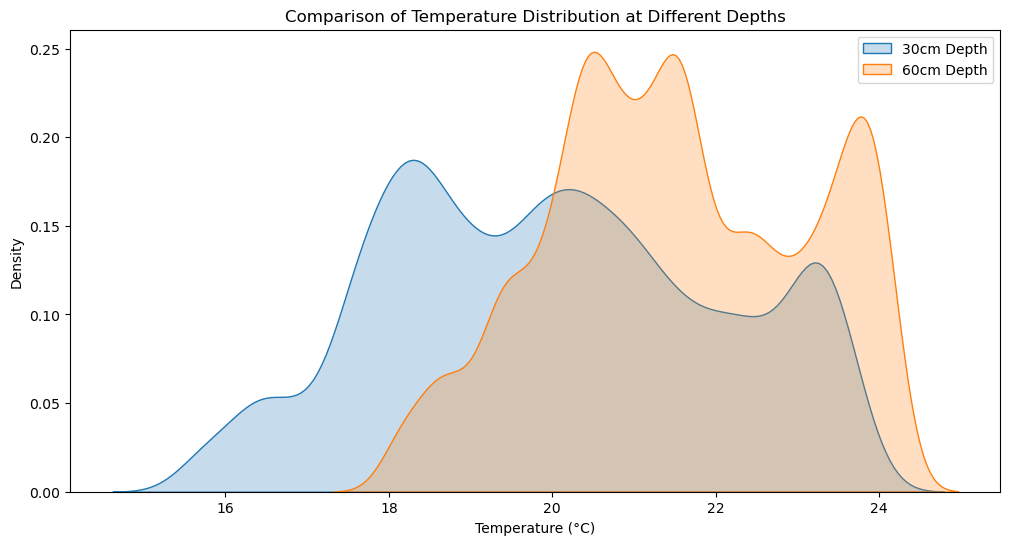

In [9]:
# Comparison of Depths
plt.figure(figsize=(12, 6))
sns.kdeplot(data_30cm["Temperature"], label="30cm Depth", fill=True)
sns.kdeplot(data_60cm["Temperature"], label="60cm Depth", fill=True)
plt.title("Comparison of Temperature Distribution at Different Depths")
plt.xlabel("Temperature (°C)")
plt.legend()
plt.show()

### Turbidity

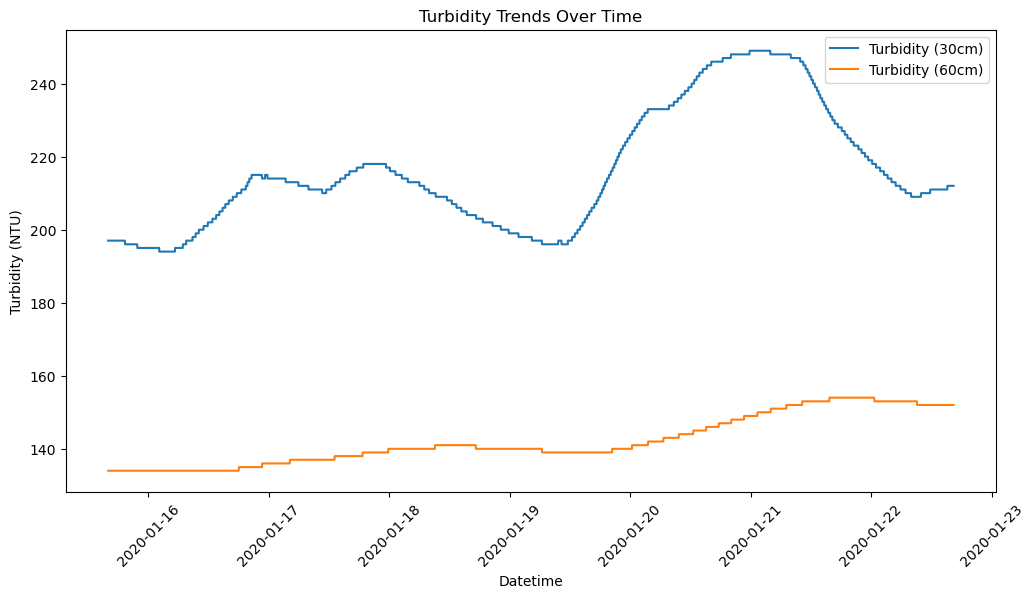

In [10]:
# Time-Series Analysis of Turbidity
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_30cm, x="Datetime", y="Turbidity", label="Turbidity (30cm)")
sns.lineplot(data=data_60cm, x="Datetime", y="Turbidity", label="Turbidity (60cm)")
plt.title("Turbidity Trends Over Time")
plt.xlabel("Datetime")
plt.ylabel("Turbidity (NTU)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


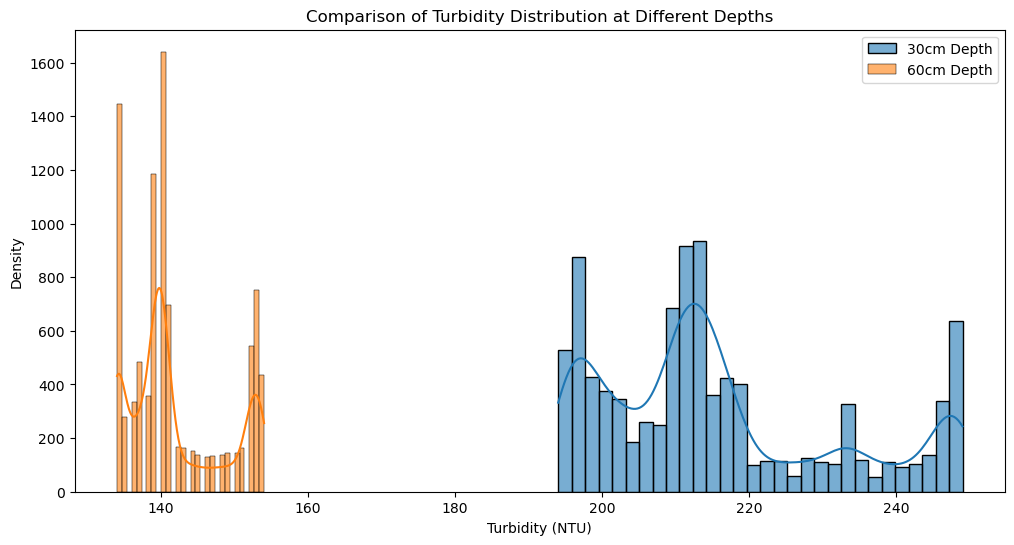

In [11]:
# Distribution Analysis of Turbidity
plt.figure(figsize=(12, 6))
sns.histplot(data_30cm["Turbidity"], bins=30, kde=True, label="30cm Depth", alpha=0.6)
sns.histplot(data_60cm["Turbidity"], bins=30, kde=True, label="60cm Depth", alpha=0.6)
plt.title("Comparison of Turbidity Distribution at Different Depths")
plt.xlabel("Turbidity (NTU)")
plt.ylabel("Density")
plt.legend()
plt.show()

### Correlation Matricies

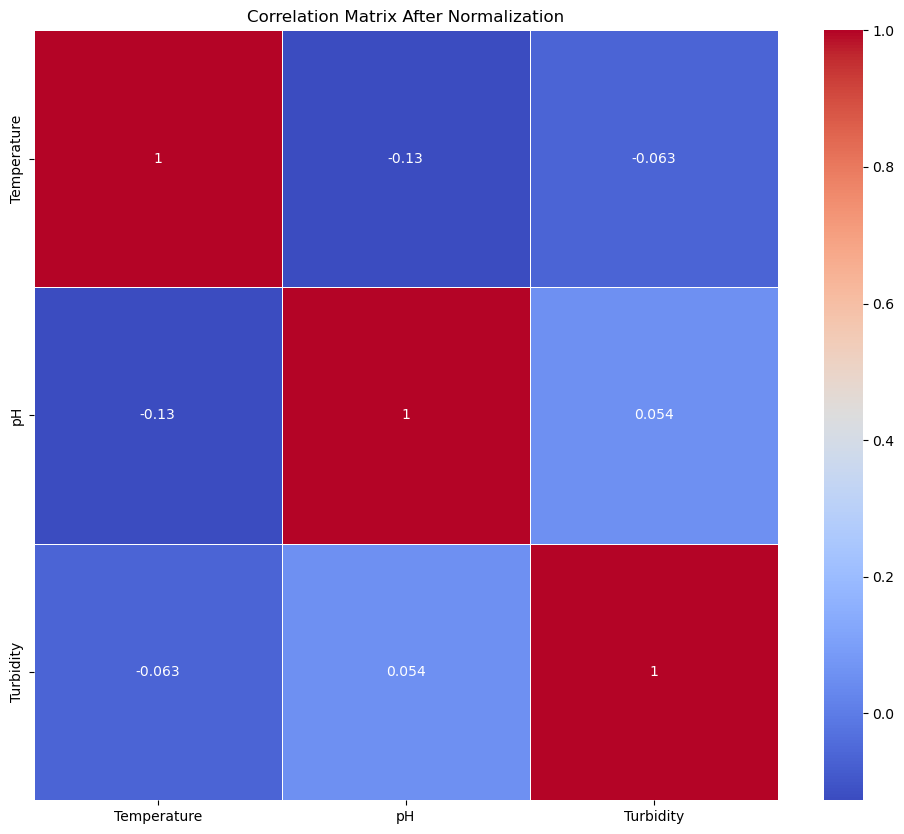

In [12]:
# Compute and visualize the correlation matrix
normalized_correlation_matrix_30cm = data_30cm[["Temperature", "pH", "Turbidity"]].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(normalized_correlation_matrix_30cm, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix After Normalization")
plt.show()

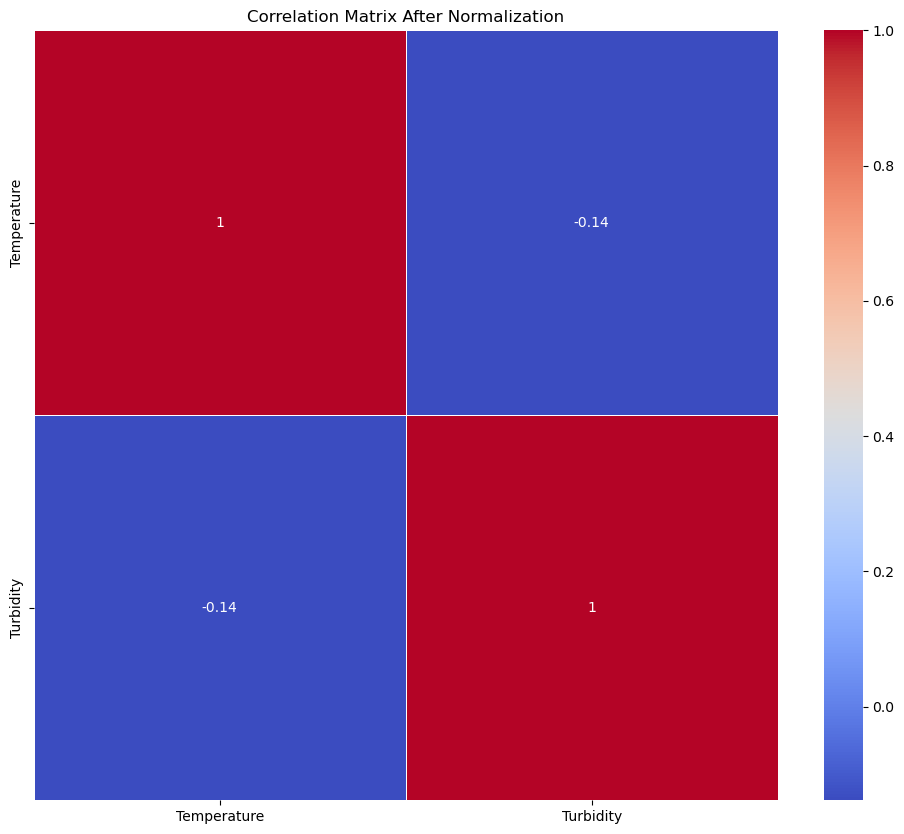

In [13]:
# Compute and visualize the correlation matrix
normalized_correlation_matrix_60cm = data_60cm[["Temperature", "Turbidity"]].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(normalized_correlation_matrix_60cm, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix After Normalization")
plt.show()

In [34]:
# Resampling data to get daily averages
data_30cm_no_date = data_30cm.drop('Date', axis=1)
data_30cm_no_date.set_index('Datetime', inplace=True)

data_60cm_no_date = data_60cm.drop('Date', axis=1)
data_60cm_no_date.set_index('Datetime', inplace=True)

# Resample data to different time frames
data_30cm_hourly = data_30cm_no_date.resample('h').mean()
data_30cm_daily = data_30cm_no_date.resample('D').mean()
data_30cm_weekly = data_30cm_no_date.resample('W').mean()

data_60cm_hourly = data_60cm_no_date.resample('h').mean()
data_60cm_daily = data_60cm_no_date.resample('D').mean()
data_60cm_weekly = data_60cm_no_date.resample('W').mean()

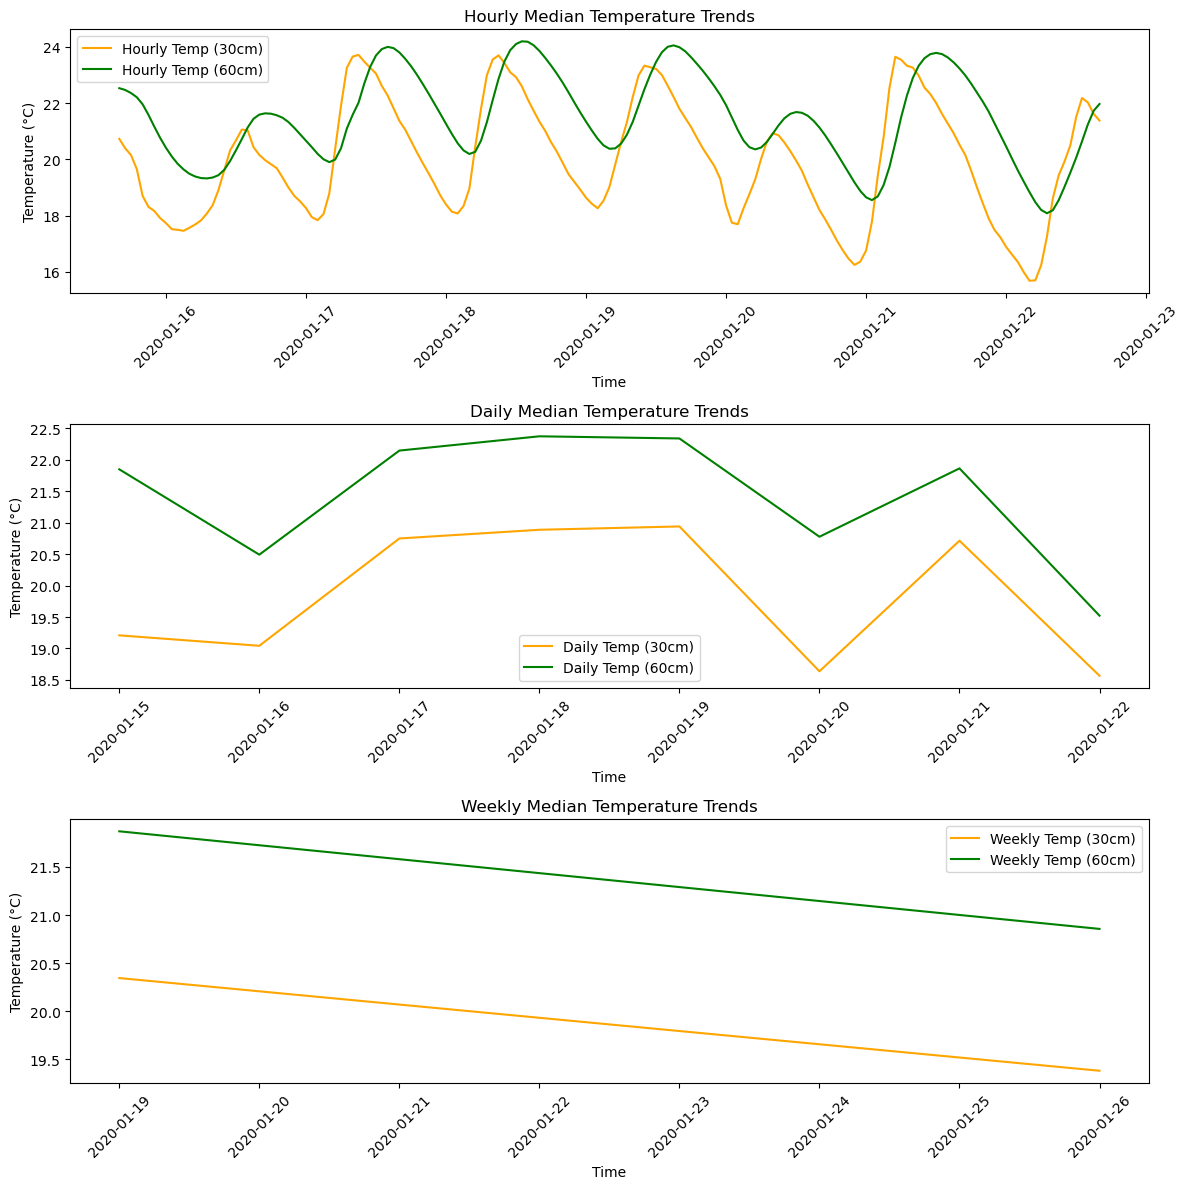

In [35]:


# Create subplots for different time frames
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=False)

# Hourly Trends
sns.lineplot(data=data_30cm_hourly, x="Datetime", y="Temperature", ax=axes[0], label="Hourly Temp (30cm)", color='orange')
sns.lineplot(data=data_60cm_hourly, x="Datetime", y="Temperature", ax=axes[0], label="Hourly Temp (60cm)", color='green')
axes[0].set_title("Hourly Median Temperature Trends")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Temperature (°C)")
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Daily Trends
sns.lineplot(data=data_30cm_daily, x="Datetime", y="Temperature", ax=axes[1], label="Daily Temp (30cm)", color='orange')
sns.lineplot(data=data_60cm_daily, x="Datetime", y="Temperature", ax=axes[1], label="Daily Temp (60cm)", color='green')
axes[1].set_title("Daily Median Temperature Trends")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Temperature (°C)")
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Weekly Trends
sns.lineplot(data=data_30cm_weekly, x="Datetime", y="Temperature", ax=axes[2], label="Weekly Temp (30cm)", color='orange')
sns.lineplot(data=data_60cm_weekly, x="Datetime", y="Temperature", ax=axes[2], label="Weekly Temp (60cm)", color='green')
axes[2].set_title("Weekly Median Temperature Trends")
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Temperature (°C)")
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

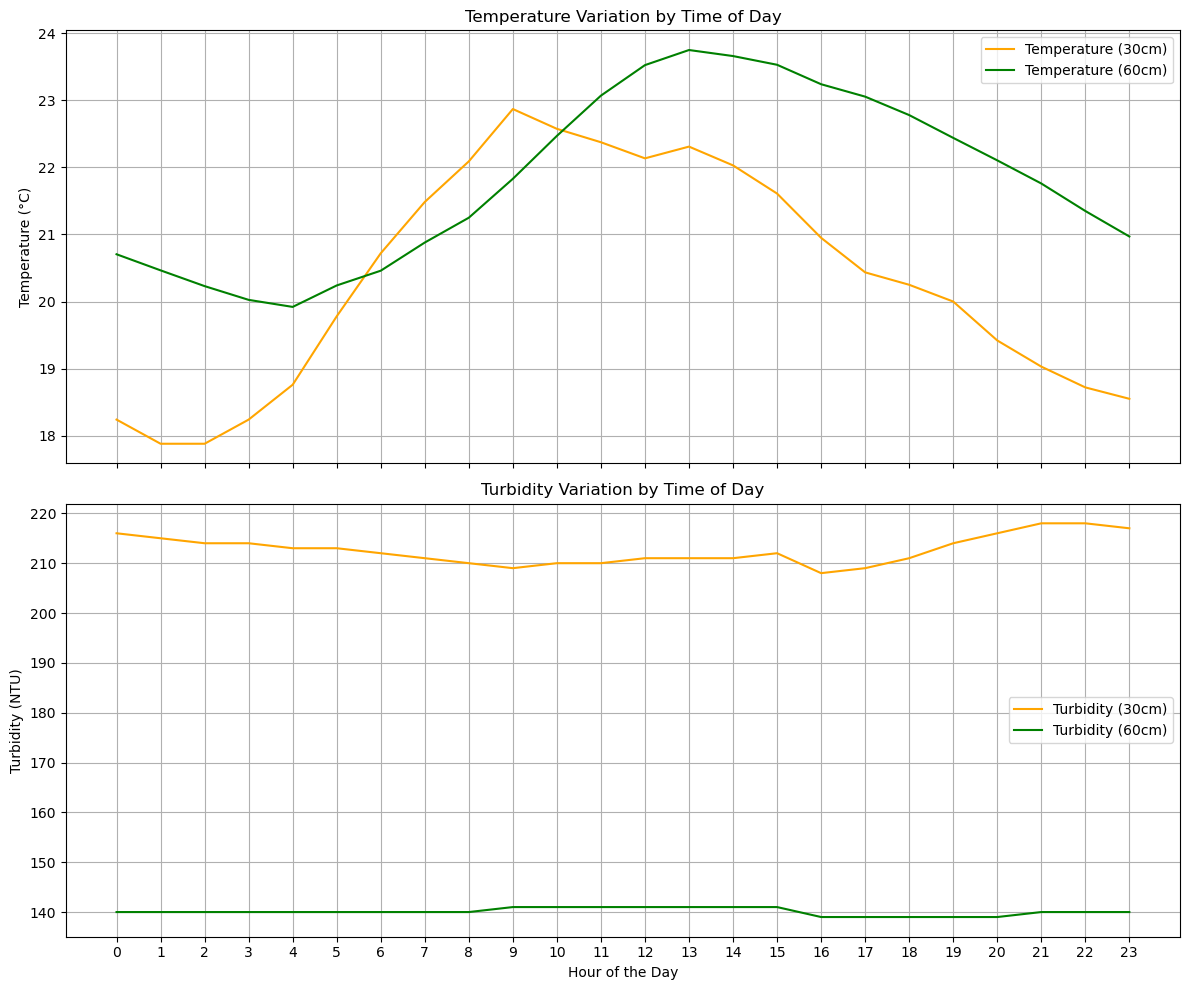

In [39]:
# Aggregate by hour to compute median values
data_30cm_hourly = data_30cm_no_date.groupby("Hour").median()
data_60cm_hourly = data_60cm_no_date.groupby("Hour").median()

# Create subplots for Temperature and Turbidity comparisons
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Define hours for x-ticks
hours = list(range(24))  # 0 to 23 hours

# Temperature Trends by Hour
sns.lineplot(data=data_30cm_hourly, x=data_30cm_hourly.index, y="Temperature", ax=axes[0], label="Temperature (30cm)", color="orange")
sns.lineplot(data=data_60cm_hourly, x=data_60cm_hourly.index, y="Temperature", ax=axes[0], label="Temperature (60cm)", color="green")
axes[0].set_title("Temperature Variation by Time of Day")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel("Temperature (°C)")
axes[0].legend()
axes[0].grid(True)
axes[0].set_xticks(hours)

# Turbidity Trends by Hour
sns.lineplot(data=data_30cm_hourly, x=data_30cm_hourly.index, y="Turbidity", ax=axes[1], label="Turbidity (30cm)", color="orange")
sns.lineplot(data=data_60cm_hourly, x=data_60cm_hourly.index, y="Turbidity", ax=axes[1], label="Turbidity (60cm)", color="green")
axes[1].set_title("Turbidity Variation by Time of Day")
axes[1].set_xlabel("Hour of the Day")
axes[1].set_ylabel("Turbidity (NTU)")
axes[1].legend()
axes[1].grid(True)
axes[1].set_xticks(hours)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()